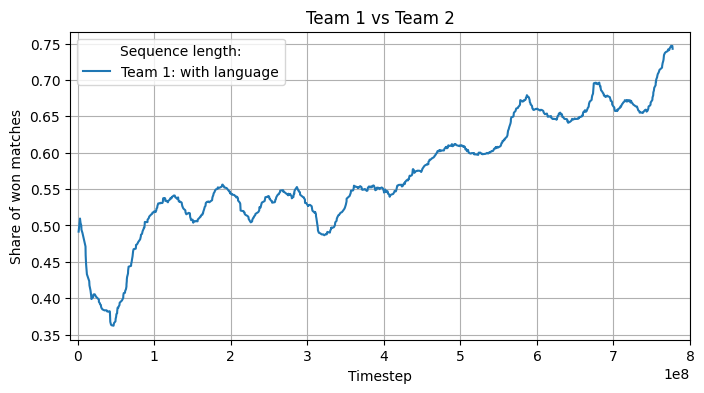

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

df1 = pd.read_csv("First_Soccer_Language/Team_1_1.csv")
# df2 = pd.read_csv("First_Soccer_Language/Team_2.csv")

# Add a column to differentiate between the files
df1['File'] = 'Team 1: with language'
# df2['File'] = 'Team 2: without language'

# Concatenate the DataFrames
df = df1
# df = pd.concat([df1, df2])

# Apply a rolling window to smooth the data over 10 data points
window_size = 40
df['Rolling Min'] = df.groupby('File')['Value'].transform(lambda x: x.rolling(window=window_size, min_periods=1).min())
df['Rolling Max'] = df.groupby('File')['Value'].transform(lambda x: x.rolling(window=window_size, min_periods=1).max())
df['Smoothed Value'] = df.groupby('File')['Value'].transform(lambda x: x.rolling(window=window_size, min_periods=1).mean())

# Plotting using seaborn
plt.figure(figsize=(8, 4))
ax = plt.gca()
sns.lineplot(data=df, x='Step', y='Smoothed Value', hue='File', style='File', dashes=False)
 
plt.title('Team 1 vs Team 2')
plt.xlabel('Timestep')
plt.ylabel('Share of won matches')
plt.grid(True)
plt.legend(title='Sequence length:')
ax.set_xlim(-0.1e8, 8e8)

hyperparameters_text = """
Hyperparameters:
- Hidden Units: 128, 64
- Entropy coefficient = 0.01
- Learning Rate: 2.5e-4
- Mini batches: 256
- Number of envs: 64
- Updates: 2288
"""
# plt.figtext(0.92, 0.25, hyperparameters_text, wrap=True, verticalalignment='center', fontsize=10)

# Save fig as pdf
plt.savefig('First_Soccer_Language/plot.pdf')